In [46]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("s3://german-credit5927/Datos/Original/german_credit_data.csv")

In [10]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [14]:
# Dividir entre train - test

from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=df["Risk"]) # stratify para que el muestreo queda igual al original

In [19]:
train["Risk"].value_counts()/train["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [20]:
test["Risk"].value_counts()/test["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [23]:
train.to_csv("s3://german-credit5927/Datos/train/train.csv", index=False)

In [24]:
test.to_csv("s3://german-credit5927/Datos/test/test.csv", index=False)

In [26]:
train.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
328,328,31,male,2,own,little,rich,4473,36,radio/TV,good
891,891,46,male,2,own,little,NaN,1829,15,radio/TV,good
255,255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
243,243,27,female,2,own,little,NaN,1185,12,business,good
492,492,27,female,2,own,moderate,NaN,1237,6,radio/TV,good


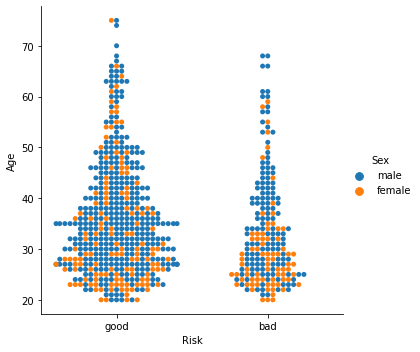

In [33]:
import seaborn as sns

g1 = sns.catplot(data=train, x="Risk", y="Age", hue="Sex", kind="swarm")

In [34]:
pd.crosstab(index=train["Housing"], columns=train["Risk"], margins=True)

Risk,bad,good,All
Housing,,,
free,29,45,74
own,133,371,504
rent,48,74,122
All,210,490,700


In [38]:
table_sex = pd.crosstab(index=train["Sex"], columns=train["Risk"], margins=True)

In [39]:
table_sex["Probabilidad"] = table_sex.iloc[:,1]/table_sex.iloc[:,2] # Se crea una columna para indicar la probabilidad de que sean good respecto al sexo

In [40]:
table_sex

Risk,bad,good,All,Probabilidad
Sex,,,,
female,76,138,214,0.64486
male,134,352,486,0.72428
All,210,490,700,0.70000


# Pre-pocesamiento

In [41]:
from sklearn.impute import SimpleImputer #Se cargan librerias para la imputación

In [81]:
X_train = train[["Age", "Credit amount", "Duration"]] # df con variables numericas

In [43]:
imputer = SimpleImputer(strategy="mean") # Creamos el objeto con la estrategia "mean"

In [44]:
imputer.fit(X_train) # En este punto solo calculo las medias

SimpleImputer()

In [45]:
imputer.statistics_ # Media de cada variable

array([  35.40285714, 3236.12142857,   21.04857143])

In [47]:
imputer.transform([[24, 1000, np.nan], [np.nan, np.nan, 12]]) # Se realiza la imputación como la media sobre un arreglo de ejemplo

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[  24.        , 1000.        ,   21.04857143],
       [  35.40285714, 3236.12142857,   12.        ]])

In [48]:
imputer.fit_transform(X_train) #Para hacer la imputación de una vez 

array([[3.100e+01, 4.473e+03, 3.600e+01],
       [4.600e+01, 1.829e+03, 1.500e+01],
       [2.700e+01, 7.418e+03, 6.000e+01],
       ...,
       [6.300e+01, 1.655e+03, 1.200e+01],
       [4.900e+01, 2.096e+03, 1.200e+01],
       [3.700e+01, 3.676e+03, 6.000e+00]])

In [55]:
X_train = train[["Saving accounts", "Checking account"]]

In [56]:
imputer = SimpleImputer(strategy="most_frequent") # Creamos el objeto con la estrategia "most_frequent"

In [57]:
imputer.fit(X_train) # En este punto solo calculo las medias

SimpleImputer(strategy='most_frequent')

In [58]:
imputer.statistics_ # Mas frecuente de cada variable

array(['little', 'little'], dtype=object)

In [59]:
imputer.transform(X_train)

array([['little', 'rich'],
       ['little', 'little'],
       ['little', 'moderate'],
       ...,
       ['little', 'little'],
       ['little', 'little'],
       ['little', 'little']], dtype=object)

In [71]:
# KNN Imputer

df2 = pd.DataFrame([[40, 19, 3], [42,20,3.1], [44,21,np.nan], [45,23,4.1], [39,25, 5.0], [80,27,np.nan], [82,3.0,4.8]], columns=["Peso", "Edad", "nota"])

In [72]:
df2

,Peso,Edad,nota
0,40,19.0,3.0
1,42,20.0,3.1
2,44,21.0,NaN
3,45,23.0,4.1
4,39,25.0,5.0
5,80,27.0,NaN
6,82,3.0,4.8


In [74]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [75]:
result = imputer.fit_transform(df2)

In [76]:
result

array([[40.  , 19.  ,  3.  ],
       [42.  , 20.  ,  3.1 ],
       [44.  , 21.  ,  3.6 ],
       [45.  , 23.  ,  4.1 ],
       [39.  , 25.  ,  5.  ],
       [80.  , 27.  ,  4.45],
       [82.  ,  3.  ,  4.8 ]])

## Escalado

In [78]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [79]:
escalado = StandardScaler()

In [82]:
escalado.fit(X_train[["Age"]])

StandardScaler()

In [84]:
escalado.mean_

array([35.40285714])

In [85]:
escalado.var_**0.5

array([11.23479253])

In [86]:
escalado.transform(X_train[["Age"]])

array([[-0.39189483],
       [ 0.94324331],
       [-0.74793167],
       [-0.74793167],
       [-0.74793167],
       [ 0.05315121],
       [-0.035858  ],
       [-1.0149593 ],
       [-0.48090404],
       [ 1.12126173],
       [-0.48090404],
       [-1.28198693],
       [ 1.65531698],
       [-1.10396851],
       [-0.65892246],
       [-0.65892246],
       [ 1.29928014],
       [ 1.03225252],
       [-0.74793167],
       [ 1.8333354 ],
       [ 2.27838145],
       [ 1.12126173],
       [-0.21387641],
       [-0.83694088],
       [ 0.58720647],
       [ 1.03225252],
       [-0.74793167],
       [ 1.38828935],
       [-0.74793167],
       [-0.035858  ],
       [ 2.27838145],
       [ 1.74432619],
       [ 0.23116963],
       [ 0.32017884],
       [ 0.05315121],
       [-0.65892246],
       [-0.92595009],
       [-0.035858  ],
       [ 1.38828935],
       [ 0.23116963],
       [ 0.05315121],
       [-1.10396851],
       [-0.39189483],
       [-0.92595009],
       [ 0.40918805],
       [-0

In [87]:
X_train["Age"].quantile(0.5)

33.0

In [88]:
X_train["Age"].median()

33.0

In [89]:
scaler = RobustScaler()

In [91]:
scaler.fit(X_train[["Age"]])

RobustScaler()

In [92]:
scaler.transform(X_train[["Age"]])

array([[-0.14035088],
       [ 0.9122807 ],
       [-0.42105263],
       [-0.42105263],
       [-0.42105263],
       [ 0.21052632],
       [ 0.14035088],
       [-0.63157895],
       [-0.21052632],
       [ 1.05263158],
       [-0.21052632],
       [-0.84210526],
       [ 1.47368421],
       [-0.70175439],
       [-0.35087719],
       [-0.35087719],
       [ 1.19298246],
       [ 0.98245614],
       [-0.42105263],
       [ 1.61403509],
       [ 1.96491228],
       [ 1.05263158],
       [ 0.        ],
       [-0.49122807],
       [ 0.63157895],
       [ 0.98245614],
       [-0.42105263],
       [ 1.26315789],
       [-0.42105263],
       [ 0.14035088],
       [ 1.96491228],
       [ 1.54385965],
       [ 0.35087719],
       [ 0.42105263],
       [ 0.21052632],
       [-0.35087719],
       [-0.56140351],
       [ 0.14035088],
       [ 1.26315789],
       [ 0.35087719],
       [ 0.21052632],
       [-0.70175439],
       [-0.14035088],
       [-0.56140351],
       [ 0.49122807],
       [-0